In [1]:
import sys
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def conv2D(img, kernel, strides=1):

    # Get shape of image and kernel
    xK, yK = kernel.shape
    xhK = int(np.ceil(xK / 2))        ## Half size for kernel
    yhK = int(np.ceil(yK / 2))        ## Half size for kernel
    
    xI, yI = img.shape

    # Get shape of output img
    xOut = int(((xI - xK) / strides) + 1)
    yOut = int(((yI - yK) / strides) + 1)
    outImg = np.zeros([xOut, yOut])

    # Convolve image with the kernel
    for i,x in enumerate(np.arange(xhK, xI-xhK, strides)):
        for j,y in enumerate(np.arange(yhK, yI-yhK, strides)):
            imgMat = img[ x-xhK+1 : x+xhK, y-yhK+1 : y+yhK ]
            outImg[i, j] = (kernel * imgMat).sum()

    return outImg


In [9]:
##############################
## Define args
indir = '/content/drive/MyDrive/CommonFiles/MUSA650-Data'
imgName = indir + '/upenn1.png'
#imgName = indir + '/Lenna.png'
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]) 
#kernel = np.array([[-1, -1, -1], [1, 1, 1], [-1, -1, -1]]) 
kernel = np.ones([13,13])/169
#kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
#kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).T

In [10]:
## Read img
img = io.imread(imgName, as_gray=True)

In [6]:
## Increase contrast
#img = (img - 0.15)/0.85
#img[img<0]=0   
#img[img>1]=1

In [11]:
## Apply convolution
#imgC = convolve2D(img, kernel, padding=1, strides = 5)
imgC = conv2D(img, kernel, strides = 1)

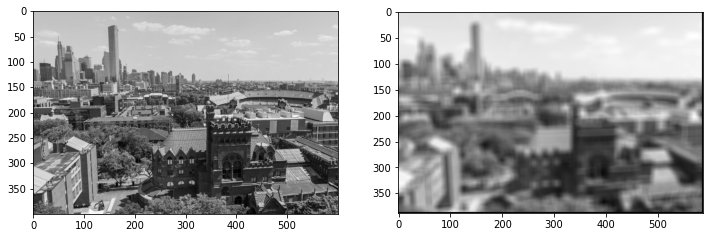

In [12]:
## Show img
f, ax = plt.subplots(1, 2, figsize=(12, 24))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(imgC, cmap='gray')
plt.show()
